#### Unsupervised Machine Learning: no target/output. It finds hidden patterns in unlabeled data without any predifend output

---
* K-means clustering
* Hierarchical Clustering





In [26]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [27]:
df=pd.read_csv('/content/sample_data/customers.csv')
df.head()

,CustomerID,AnnualIncome,SpendingScore
0,1,15,79
1,2,16,81
2,3,17,76
3,4,18,75
4,5,19,73


In [28]:
df.head()

,CustomerID,AnnualIncome,SpendingScore
0,1,15,79
1,2,16,81
2,3,17,76
3,4,18,75
4,5,19,73


In [29]:
df.shape

(20, 3)

In [30]:
X=df[['AnnualIncome',	'SpendingScore']]

In [31]:
model=KMeans(n_clusters=5,random_state=42)

In [32]:
df['Cluster']=model.fit_predict(X)

In [33]:
df

,CustomerID,AnnualIncome,SpendingScore,Cluster
0,1,15,79,2
1,2,16,81,2
2,3,17,76,2
3,4,18,75,2
4,5,19,73,2
5,6,20,72,2
6,7,25,40,0
7,8,28,42,0
8,9,30,39,0
9,10,33,35,0


In [34]:
centers=model.cluster_centers_
centers

array([[30.4       , 37.2       ],
       [67.66666667, 87.66666667],
       [17.5       , 76.        ],
       [58.        , 17.66666667],
       [43.33333333, 64.33333333]])

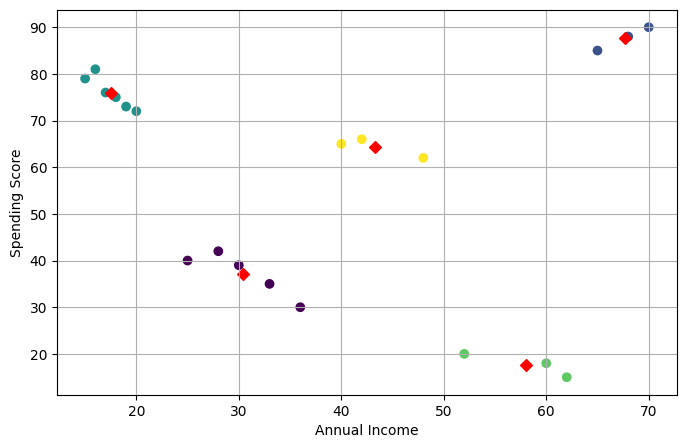

In [35]:
plt.figure(figsize=(8,5))
plt.scatter(df['AnnualIncome'],df['SpendingScore'],c=df['Cluster'])
plt.scatter(centers[:,0],centers[:,1],color='red',marker='D')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()


### **Exercise:01** **Day-13**
* A store wants to group its product based on
* Monthly Sales Units
* and Return Rate percent
### Use K-means clustering do the grouping Do the following tasks
* import pandas,matplotlib and kMeans
* select two features Monthly_Sales_Units,Return_Rate_Percent
* Apply K-Means with K-3
* Add a new column Cluster
* Display final DataFrame
* Create scatter plot for clusters

In [37]:
data={"Monthly_Sales_Units":[500,450,400,300,280,200,150,100],
    "Return_Rate_Percent":[2,3,3,4,5,6,7,8]
}

In [38]:
df=pd.DataFrame(data)
df

,Monthly_Sales_Units,Return_Rate_Percent
0,500,2
1,450,3
2,400,3
3,300,4
4,280,5
5,200,6
6,150,7
7,100,8


In [47]:
X=df[['Monthly_Sales_Units','Return_Rate_Percent']]#select two features Monthly_Sales_Units,Return_Rate_Percent

In [48]:
model=KMeans(n_clusters=3,random_state=42) #Apply K-Means with K-3

In [49]:
df['Cluster']=model.fit_predict(X) #Add a new column Cluster

In [50]:
df #Display final DataFrame

,Monthly_Sales_Units,Return_Rate_Percent,Cluster
0,500,2,2
1,450,3,2
2,400,3,0
3,300,4,0
4,280,5,0
5,200,6,1
6,150,7,1
7,100,8,1


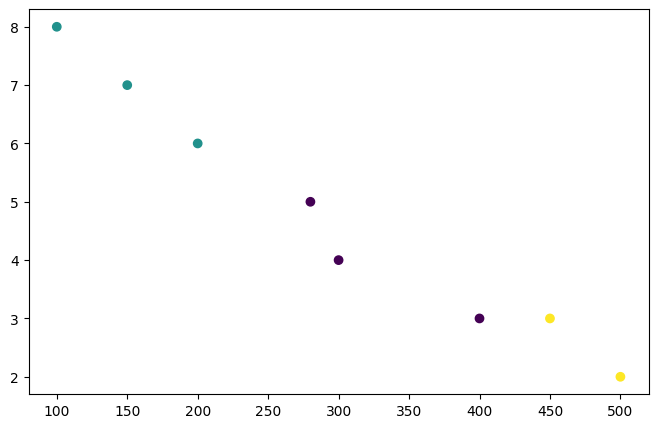

In [51]:
plt.figure(figsize=(8,5))         #Create scatter plot for clusters
plt.scatter(df['Monthly_Sales_Units'],df['Return_Rate_Percent'],c=df['Cluster'])
plt.show()

In [53]:
centroid=model.cluster_centers_
centroid

array([[326.66666667,   4.        ],
       [150.        ,   7.        ],
       [475.        ,   2.5       ]])

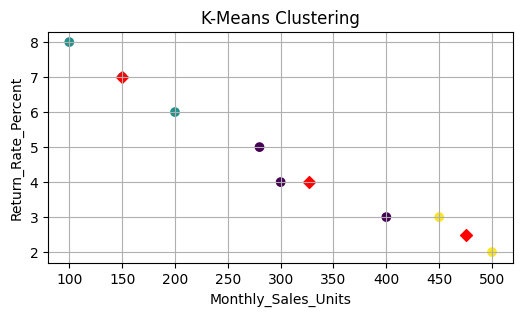

In [57]:
plt.figure(figsize=(6,3))
plt.scatter(df['Monthly_Sales_Units'],df['Return_Rate_Percent'],c=df['Cluster'])
plt.scatter(centroid[:,0],centroid[:,1],color='red',marker='D')
plt.title('K-Means Clustering')
plt.xlabel('Monthly_Sales_Units')
plt.ylabel('Return_Rate_Percent')
plt.grid(True)
plt.show()


**Hierarchical Clustering**: is unsupervised machine learning techinque that groups data into a hiearachy of clusters.
*Build a tree a like structure
* No need to choose the clusters intially
* shows relationships using tree like structure diagram(dendogram)

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

In [60]:
#monthly_spend, visit_per_month
data={
    'Customer_1':[500,3],
    'Customer_2':[520,4],
    'Customer_3':[480,2],
    'Customer_4':[550,5],
    'Customer_5':[1500,8],
    'Customer_6':[1200,7],
    'Customer_7':[1700,9]
}


In [62]:
df=pd.DataFrame(data)
df

,Customer_1,Customer_2,Customer_3,Customer_4,Customer_5,Customer_6,Customer_7
0,500,520,480,550,1500,1200,1700
1,3,4,2,5,8,7,9


In [63]:
df=pd.DataFrame(data,index=['Monthly_Spend','Visit_Per_Month'])
df

,Customer_1,Customer_2,Customer_3,Customer_4,Customer_5,Customer_6,Customer_7
Monthly_Spend,500,520,480,550,1500,1200,1700
Visit_Per_Month,3,4,2,5,8,7,9


In [64]:
df=pd.DataFrame(data,index=['Monthly_Spend','Visit_Per_Month']).T
df

,Monthly_Spend,Visit_Per_Month
Customer_1,500,3
Customer_2,520,4
Customer_3,480,2
Customer_4,550,5
Customer_5,1500,8
Customer_6,1200,7
Customer_7,1700,9


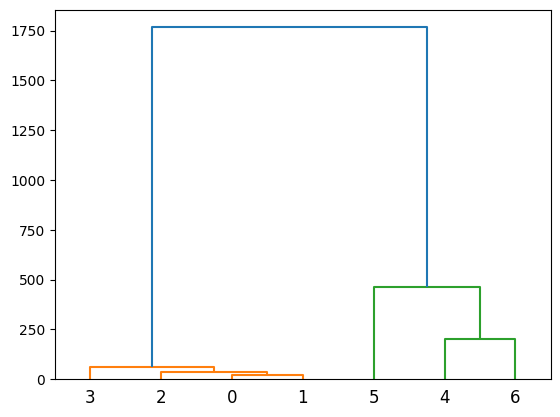

In [65]:
#Creating Dendogram for this dataframe
linkage_data=linkage(df,method='ward')
# dendrogram(linkage_data)
# plt.show()


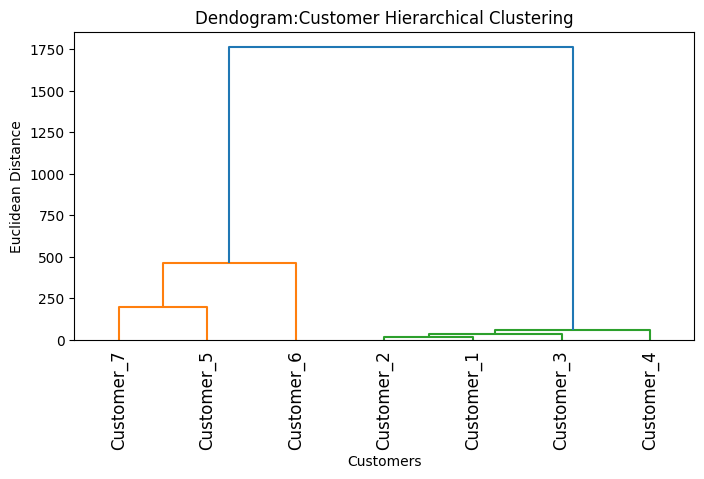

In [68]:
plt.figure(figsize=(8,4))
dendrogram(linkage_data, labels=df.index, leaf_rotation=90,distance_sort='descending')
plt.title('Dendogram:Customer Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()





In [71]:
model=AgglomerativeClustering(n_clusters=2,linkage='ward',metric='euclidean')

In [72]:
df['Cluster']=model.fit_predict(df)

In [73]:
df

,Monthly_Spend,Visit_Per_Month,Cluster
Customer_1,500,3,1
Customer_2,520,4,1
Customer_3,480,2,1
Customer_4,550,5,1
Customer_5,1500,8,0
Customer_6,1200,7,0
Customer_7,1700,9,0


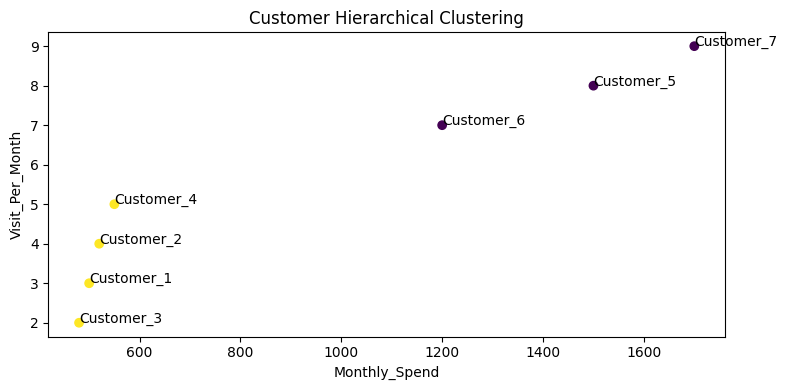

In [87]:
plt.figure(figsize=(8,4))
plt.scatter(df['Monthly_Spend'],df['Visit_Per_Month'],c=df['Cluster'])
for i in df.index:
  plt.text(df.loc[i,'Monthly_Spend'],df.loc[i,'Visit_Per_Month'],i)
plt.xlabel('Monthly_Spend')
plt.ylabel('Visit_Per_Month')
plt.title('Customer Hierarchical Clustering')
plt.tight_layout()

plt.show()

In [88]:
# Using Mall_Customers.csv
df_customers=pd.read_csv('/content/sample_data/Mall_Customers.csv')


In [89]:
df_customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [96]:
X=df_customers[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [97]:
linkage_data=linkage(X,method='ward')

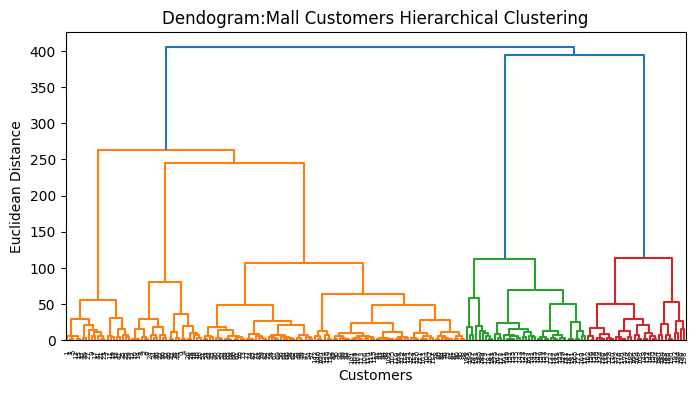

In [95]:
plt.figure(figsize=(8,4))
dendrogram(linkage_data)
plt.title('Dendogram:Mall Customers Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [100]:
model=AgglomerativeClustering(n_clusters=5,linkage='ward',metric='euclidean')

In [101]:
df_customers['Cluster']=model.fit_predict(X)
#

In [102]:
print('\n Clustered Data')
df_customers


 Clustered Data


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


#### Use following dataset and do the following tasks
* Plot a dendogram (Use Eculidean distance and Ward linkage)
* Use AgglomerativeClustering add cluster labels to the DataFrame
* Show the final DataFrame

In [104]:

dataset={
    'StudyHours':[1,2,3,4,5,6,7,8,9],
    'Attendance':[50,55,60,65,70,80,85,90,95],
    'TestScore':[35,40,50,55,70,75,85,92,95]
}

In [105]:
df=pd.DataFrame(dataset)
df

,StudyHours,Attendance,TestScore
0,1,50,35
1,2,55,40
2,3,60,50
3,4,65,55
4,5,70,70
5,6,80,75
6,7,85,85
7,8,90,92
8,9,95,95


**DBSCAN: Density Based Spatial Clustering of Applications with Noise**
* Does not require K
* finds cluster of any shape
* automatically detects noise
* useful in real world messy data
* eps: Maximum distance between two points to be considered neighbors
* min_samples: Minimum numbers of points to form a dense region


In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [110]:
dataset={
    'Latitude':[11.0,12.97,12.98,12.99,13.0,13.01,13.02,13.03,13.04,19.07,19.08,19.09,28.61],
    'Longitude':[75.59,77.60,77.61,77.62,72.87,72.88,72.89,72.90,72.95,72.91,72.95,72.96,77.9]
    }

In [112]:
df=pd.DataFrame(dataset)
df

,Latitude,Longitude
0,11.00,75.59
1,12.97,77.60
2,12.98,77.61
3,12.99,77.62
4,13.00,72.87
5,13.01,72.88
6,13.02,72.89
7,13.03,72.90
8,13.04,72.95
9,19.07,72.91


In [113]:
df.shape

(13, 2)

In [114]:
X=df[['Latitude','Longitude']]

In [115]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [116]:
model_dbscan=DBSCAN(eps=0.1,min_samples=3,metric='euclidean')

In [117]:
df['Cluster']=model_dbscan.fit_predict(X_scaled)

In [119]:
df

,Latitude,Longitude,Cluster
0,11.00,75.59,-1
1,12.97,77.60,0
2,12.98,77.61,0
3,12.99,77.62,0
4,13.00,72.87,1
5,13.01,72.88,1
6,13.02,72.89,1
7,13.03,72.90,1
8,13.04,72.95,1
9,19.07,72.91,2


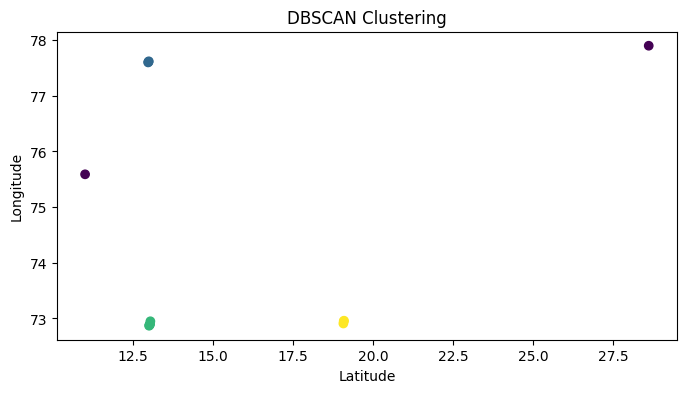

In [123]:
plt.figure(figsize=(8,4))
plt.scatter(df['Latitude'],df['Longitude'],c=df['Cluster'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('DBSCAN Clustering')
plt.show()